# **Stock Movement Analysis Based on Social Media Sentiment**


**Objective:**

Develop a machine learning model that predicts stock movements by
scraping data from social media platforms like Twitter, Reddit, or Telegram. The
model should extract insights from user-generated content, such as stock
discussions, predictions, or sentiment analysis, and accurately forecast stock price
trends.

Install all the main libraries required for this task

In [49]:
!pip install telethon nltk pandas matplotlib seaborn wordcloud yfinance

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
! pip install textblob

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
! pip install vaderSentiment pandas matplotlib

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
!pip install emoji
!pip install urlextract

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
! pip install gensim pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**asyncio** is used for handling asynchronous tasks, allowing real-time data collection from Telegram without blocking the code execution.

In [54]:
import asyncio

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


This block imports necessary libraries and initializes the Telegram client using the Telethon library. It connects to the Telegram API using your unique api_id, api_hash, and phone_number from my.telegram.org, allowing you to interact with Telegram channels and retrieve data for further analysis.

In [55]:
from telethon.sync import TelegramClient
import pandas as pd

api_id = '24987709'
api_hash = '11f063f6c58c314a64d35fae924e5d53'
phone_number = '8240726562'

# Create the client and connect
client = TelegramClient('session_name', api_id, api_hash)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
import pandas as pd
import re
from emoji import demojize
from textblob import TextBlob
from urlextract import URLExtract
from datetime import datetime
from telethon import TelegramClient
import getpass
# Initialize URL extractor
extractor = URLExtract()

# Function to clean and preprocess messages
def clean_message(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)

    # Remove special characters, mentions (@username), hashtags, and newlines
    text = re.sub(r'\@\w+|\#|\n|\r', '', text)

    # Remove emojis
    text = demojize(text)

    # Convert text to lowercase for consistency
    text = text.lower()

    return text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


This above block imports necessary libraries for cleaning and preprocessing messages, including removing URLs, special characters, and emojis. It also defines a function to clean and standardize the text for sentiment analysis.

In [57]:
# Function to extract hashtags from text
def extract_hashtags(text):
    # Find all hashtags in the text
    hashtags = re.findall(r'\#\w+', text)
    return hashtags

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The above block defines a function that uses regular expressions to find and extract all hashtags from the given text.

In [58]:
async def main():
    await client.start()
    print("Client Created")

    # Specify the channel username here
    channel_username = 'stocks'  # Replace with actual Telegram channel

    # Fetch messages from the Telegram channel
    messages = await client.get_messages(channel_username, limit=5000)

    # Create a list to store message data
    messages_data = []

    # Check if messages are being fetched
    if not messages:
        print("No messages found in the channel.")
        return

    for message in messages:
        if message.message:  # Process only if there is a message (text content)
            clean_text = clean_message(message.message)  # Clean the message


            # Extract hashtags
            hashtags = extract_hashtags(message.message)  # Extract hashtags from the original message


            # Add to the dataset
            messages_data.append({
                'id': message.id,
                'date': message.date.strftime('%Y-%m-%d'),  # Store date in 'YYYY-MM-DD' format
                'text': clean_text,
                'message_length': len(clean_text),  # Length of the cleaned message
                'hashtags': hashtags,  # List of hashtags mentioned
            })

    # Create a DataFrame from the list
    df_messages = pd.DataFrame(messages_data)

    # Clean and preprocess the text data
    df_messages['text'] = df_messages['text'].apply(clean_message)

    # Handle Missing Values
    df_messages.dropna(subset=['text'], inplace=True)

    # Remove duplicates
    df_messages.drop_duplicates(subset=['text'], keep='first', inplace=True)

    # Optionally reset the index after dropping rows
    df_messages.reset_index(drop=True, inplace=True)

    # Display the cleaned DataFrame
    print(f"Total messages after cleaning: {len(df_messages)}")
    print(df_messages.head())  # Display the first few rows of the cleaned DataFrame

    # Save the cleaned DataFrame to a CSV file
    df_messages.to_csv('Stock_Movement.csv', index=False)
    print("Stock_Movement.csv")

# Run the main function in an existing event loop
async def run():
    await main()

# Execute the function
await run()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/lib/python3.10/asyncio/events.py:80: DeprecationWarning: `run_cell_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  self._context.run(self._callback, *self._args)


Client Created
Total messages after cleaning: 976
     id        date                                               text  \
0  1081  2024-12-05  :united_states: carbon capture and storage mar...   
1  1080  2024-12-05  :india: global antibiotics market is expected ...   
2  1079  2024-12-04  :united_states: this may be the most expensive...   
3  1078  2024-12-04  :india: stock market live updates: gift nifty ...   
4  1077  2024-12-03  :united_states: can a market be too hot? shoul...   

   message_length hashtags  
0            1262       []  
1            1083       []  
2            1013       []  
3            1041       []  
4            1094       []  
Stock_Movement.csv


The above  code connects to a Telegram channel, fetches 5000 messages, cleans the text, extracts hashtags, and stores the processed data in a DataFrame. It removes missing values and duplicates, then saves the cleaned data to a CSV file named Stock_Movement.csv

In [59]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


This code imports necessary libraries, downloads the VADER lexicon from NLTK, and initializes the VADER sentiment analyzer (SentimentIntensityAnalyzer) for sentiment analysis tasks using the nltk library.

In [60]:
# Function to classify sentiment based on compound polarity score
def classify_sentiment(polarity_scores):
    compound_score = polarity_scores['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


This above function classify_sentiment() takes in polarity scores (generated by a sentiment analyzer) and classifies the sentiment based on the compound score:


If the compound score is ≥ 0.05, it returns 'Positive'.

If the score is ≤ -0.05, it returns 'Negative'.

Otherwise, it returns 'Neutral'.

In [13]:
#  Load the CSV file containing Telegram messages
df_messages = pd.read_csv('Stock_Movement.csv')

# Replace missing text with an empty string
df_messages['text'] = df_messages['text'].fillna('')

# Perform sentiment analysis for each message and store results
df_messages['polarity'] = df_messages['text'].apply(lambda text: sid.polarity_scores(text)['compound'])

# Classify the sentiment type (positive, negative, neutral) based on polarity
df_messages['sentiment_type'] = df_messages['polarity'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))

This above  code loads a CSV file with Telegram messages, replaces any missing text with an empty string, and applies sentiment analysis to each message using VADER. It calculates the polarity score for each message and classifies the sentiment as 'Positive', 'Negative', or 'Neutral' based on the score.

In [14]:
# Display the first few rows with text, polarity, and sentiment type
display(df_messages[['text', 'polarity', 'sentiment_type','id']].head(10))

,text,polarity,sentiment_type,id
0,:united_states: this may be the most expensive...,0.7717,Positive,1081
1,:india: quick commerce market in india and key...,0.9498,Positive,1080
2,:united_states: this may be the most expensive...,0.8360,Positive,1079
3,:india: stock market live updates: gift nifty ...,0.9539,Positive,1078
4,:united_states: can a market be too hot? shoul...,0.0516,Positive,1077
5,:india: optical transport equipment market dec...,-0.2023,Negative,1076
6,:united_states: dow jones dips ahead of jobs d...,-0.4767,Negative,1075
7,:india: stock market live updates: gift nifty ...,0.9565,Positive,1074
8,:united_states: transcritical co2 systems for ...,0.0258,Neutral,1073
9,:india: breakout stocks to buy or sell: sumeet...,0.3862,Positive,1072


This code imports the Counter class from the collections module, which is used for counting elements, and the re module for working with regular expressions. These can be used for text processing tasks like counting word frequencies or pattern matching.

In [15]:
from collections import Counter
import re

In [16]:
stock_keywords = {
    'AAPL': 'Apple stock',
    'TSLA': 'Tesla stock',
    'GOOG': 'Google stock',
    'MSFT': 'Microsoft stock',
    'AMZN': 'Amazon stock',
    'bullish': 'Positive market sentiment',
    'bearish': 'Negative market sentiment',
    'buy': 'Buy recommendation or positive sentiment',
    'sell': 'Sell recommendation or negative sentiment',
    'profit': 'Indication of gains or positive sentiment',
    'loss': 'Indication of losses or negative sentiment',
    'market': 'General market trend discussion',
    'stock': 'General stock discussion',
    'investment': 'Stock or market investment discussion',
    'short': 'Short-selling or negative sentiment',
    'hold': 'Hold recommendation or neutral sentiment',
    'RELIANCE': 'Reliance Industries Limited',
    'TATA': 'Tata Group',
    'TCS': 'Tata Consultancy Services Limited',
    'INFY': 'Infosys Limited',
    'bse' : 'Bomboy Stock Exchange',
    'war' : 'War',
    'nse' :'National stock exchange',
    'stock market' : 'Stock market',
    'market cap' : 'Market capitalization',
    'stock exchange' : 'Stock exchange',
    'stock price' : 'Stock price',
    'stock performance' : 'Stock performance',
    'price increase' : 'Price increase',
    'price decrease' : 'Price decrease',
    'crypto price' : 'Cryptocurrency price',
    'crypto market' : 'Cryptocurrency market',
    'cryptocurrency exchange' : 'Cryptocurrency exchange',
    'health care' : 'Health care',
    'Meta' : 'company of Facebook, Instagram, and WhatsApp',
    'VOW3' : 'Volkswagen Group',
    'BMW' : 'Bayerische Motoren Werke',
    'NFLX' : 'Netflix',
    'PYPL' : 'PayPal Holdings',
    'NIO' : 'Ningbo NIO Automobile Co., Ltd',
}

# Function to extract mentions of stock tickers or market trends from the text
def extract_stock_mentions(text, keywords):
    mentions = []
    for keyword in keywords:
        if re.search(rf'\b{keyword}\b', text, re.IGNORECASE):  # Match whole words only
            mentions.append(keyword)
    return mentions


The above  code defines a dictionary stock_keywords that maps stock tickers and market-related terms (e.g., 'AAPL', 'bullish', 'sell') to their descriptions. The function extract_stock_mentions() searches a given text for any mentions of these stock tickers or market terms. It checks for whole-word matches (case-insensitive) using regular expressions, and if a match is found, it adds the keyword to a list of mentions. The function then returns this list.

In [17]:
# Apply the function to extract mentions from each message
df_messages['mentions'] = df_messages['text'].apply(lambda text: extract_stock_mentions(text, stock_keywords))

In [18]:
# Flatten the list of mentions and count the frequency of each keyword
all_mentions = [mention for mentions in df_messages['mentions'] for mention in mentions]
mentions_count = Counter(all_mentions)

# Display the frequency of each stock or market trend keyword
print("Frequency of Mentions for Specific Stocks or Market Trends:")
for keyword, count in mentions_count.items():
    print(f"{keyword}: {count}")

Frequency of Mentions for Specific Stocks or Market Trends:
market: 647
stock: 568
stock market: 207
bse: 129
nse: 124
buy: 98
sell: 83
profit: 37
RELIANCE: 8
short: 11
Meta: 174
bullish: 9
market cap: 21
investment: 12
loss: 474
stock exchange: 352
NIO: 107
TSLA: 295
crypto market: 7
war: 10
TCS: 3
AMZN: 189
bearish: 4
BMW: 1
AAPL: 233
hold: 5
NFLX: 4
stock price: 2
TATA: 5
PYPL: 5
INFY: 1
MSFT: 5
GOOG: 4
VOW3: 163


The above code flattens the list of stock or market trend mentions extracted from the df_messages DataFrame and counts the frequency of each keyword using Counter. It then prints out the frequency of each stock or market trend keyword, showing how many times each keyword was mentioned in the messages.

<ipython-input-19-e37944c7d896>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=list(mentions_count.keys()), y=list(mentions_count.values()), palette=palette)


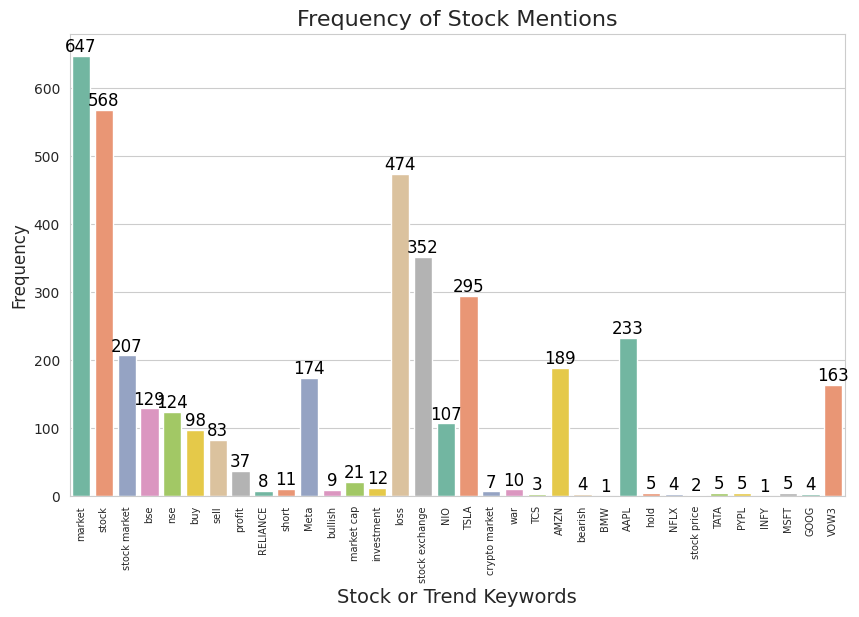

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")  # Use a clean grid style
palette = sns.color_palette("Set2", n_colors=len(mentions_count))  # Create a palette with enough colors
bars = sns.barplot(x=list(mentions_count.keys()), y=list(mentions_count.values()), palette=palette)

# Annotate the bars with their values
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'),
                  (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                  ha='center', va='bottom', fontsize=12, color='black')

plt.title('Frequency of Stock Mentions', fontsize=16)
plt.xlabel('Stock or Trend Keywords', fontsize=14)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=90, fontsize=7)
plt.yticks(fontsize=10)
plt.show()

The above code generates a bar plot to visualize stock mentions. It sets up a clean style, uses a color palette, and plots the keywords on the x-axis with their frequencies on the y-axis. The bars are annotated with their values, and the plot includes a title and labeled axes. Finally, the plot is displayed.

In [20]:
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


The above  code imports necessary libraries for topic modeling with LDA, downloads English stopwords using NLTK, and stores them in a set for filtering during text preprocessing.

In [21]:
# Preprocess the text
def preprocess(text):
    # Remove non-alphabetic characters and convert to lowercase
    text = ''.join(char for char in text if char.isalpha() or char.isspace()).lower()
    # Tokenize and remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The above function preprocesses text by removing non-alphabetic characters, converting it to lowercase, and tokenizing it into individual words. It then filters out stopwords, returning the cleaned list of tokens.

In [22]:
# Apply preprocessing to the messages
df_messages['processed_text'] = df_messages['text'].apply(preprocess)

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(df_messages['processed_text'])
corpus = [dictionary.doc2bow(text) for text in df_messages['processed_text']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The above code applies the preprocess function to each message in the df_messages DataFrame and stores the results in a new column processed_text. Then, it creates a dictionary of unique words and a corpus (bag-of-words representation) from the preprocessed text, which are needed for LDA modeling.

In [23]:
# Build the LDA model
num_topics = 10  # Specify the number of topics
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
# Display the topics
print("Identified Topics:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx + 1}: {topic}")

Identified Topics:
Topic 1: 0.046*"market" + 0.021*"markets" + 0.016*"stock" + 0.011*"cnbcunitedstates" + 0.010*"wall" + 0.010*"street" + 0.010*"unitedstates" + 0.009*"top" + 0.009*"news" + 0.009*"unitedstatestearoffcalendar"
Topic 2: 0.041*"market" + 0.024*"stock" + 0.020*"news" + 0.015*"mintindia" + 0.012*"buy" + 0.012*"today" + 0.011*"markets" + 0.011*"stocks" + 0.007*"sell" + 0.007*"india"
Topic 3: 0.100*"h" + 0.046*"price" + 0.045*"hcompany" + 0.040*"top" + 0.015*"losers" + 0.015*"gainers" + 0.015*"downrightarrow" + 0.015*"uprightarrow" + 0.015*"hot" + 0.015*"fire"
Topic 4: 0.054*"market" + 0.016*"markets" + 0.015*"stock" + 0.009*"news" + 0.009*"top" + 0.008*"stories" + 0.007*"date" + 0.007*"yahoo" + 0.007*"unitedstatestearoffcalendar" + 0.007*"unitedstates"
Topic 5: 0.015*"market" + 0.005*"markets" + 0.005*"global" + 0.004*"wall" + 0.004*"globenewswireunitedstates" + 0.004*"cnbcunitedstates" + 0.004*"stock" + 0.004*"news" + 0.004*"reutersunitedstates" + 0.003*"street"
Topic 6: 0.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Interpretation of Topics: Here are some possible interpretations based on your output:

Topic 1:

Common terms: "company," "price," "stock," "losers"
Interpretation: This topic may be discussing stock performance metrics, particularly focusing on companies that are losing value.

Topic 2:

Common terms: "moneybag," "stocks," "new"
Interpretation: This topic could be centered around financial transactions, new stock opportunities, or updates regarding certain stocks.

In [25]:
# Visualize the topics using pyLDAvis
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

# Display the visualization in the Jupyter Notebook
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
display(df_messages.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,date,text,message_length,hashtags,polarity,sentiment_type,mentions,processed_text
0,1081,2024-12-05,:united_states: this may be the most expensive...,1013,[],0.7717,Positive,"[market, stock, stock market]","[unitedstates, may, expensive, stock, market, ..."
1,1080,2024-12-05,:india: quick commerce market in india and key...,1060,[],0.9498,Positive,"[market, stock, bse, nse, stock market]","[india, quick, commerce, market, india, key, p..."
2,1079,2024-12-04,:united_states: this may be the most expensive...,1013,[],0.8360,Positive,"[market, stock, stock market]","[unitedstates, may, expensive, stock, market, ..."
3,1078,2024-12-04,:india: stock market live updates: gift nifty ...,1041,[],0.9539,Positive,"[buy, sell, profit, market, stock, stock market]","[india, stock, market, live, updates, gift, ni..."
4,1077,2024-12-03,:united_states: can a market be too hot? shoul...,1094,[],0.0516,Positive,"[market, stock, stock market]","[unitedstates, market, hot, smaller, developer..."


In [27]:
# Convert 'date' column to datetime format
df_messages['date'] = pd.to_datetime(df_messages['date'])

# Set 'date' as the index for time series operations
df_messages.set_index('date', inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
import yfinance as yf

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
# Define stock tickers of interest
stock_symbols = ['AAPL', 'TSLA', 'GOOG', 'MSFT', 'AMZN', 'RELIANCE', 'TCS', 'VOW3', 'BMW', 'NFLX', 'PYPL', 'NIO']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
# Calculate mention count from the 'mentions' column
df_messages['mention_count'] = df_messages['mentions'].apply(len)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The below code processes stock data for each symbol by fetching historical stock prices, cleaning the data to keep adjusted close prices, and merging it with sentiment data. It calculates stock price changes and analyzes correlations between price changes, sentiment polarity, and mention count, displaying the results in a heatmap. Finally, it visualizes the stock price changes, sentiment polarity, and mention counts over time for each stock symbol in a series of plots. The process is repeated for each stock symbol in the list.

In [31]:
print(df_messages.index)

DatetimeIndex(['2024-12-05', '2024-12-05', '2024-12-04', '2024-12-04',
               '2024-12-03', '2024-12-03', '2024-12-02', '2024-12-02',
               '2024-12-01', '2024-12-01',
               ...
               '2023-08-21', '2023-08-21', '2023-08-21', '2023-08-18',
               '2023-08-17', '2023-08-16', '2023-08-15', '2023-08-12',
               '2023-08-11', '2023-01-26'],
              dtype='datetime64[ns]', name='date', length=976, freq=None)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-35-ab3850bca397>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


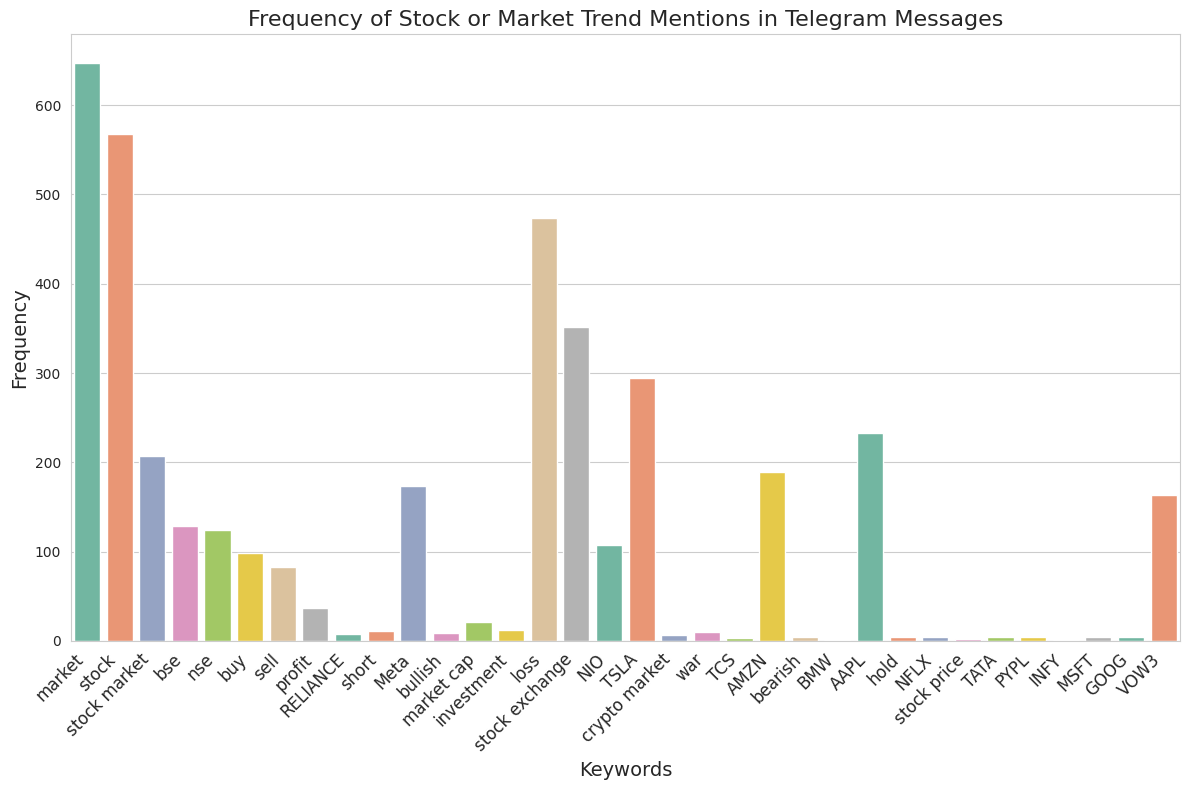

In [35]:
# Create a bar plot for the mentions count
plt.figure(figsize=(12, 8))
sns.barplot(
    x=[keyword for keyword, count in mentions_count.items()],
    y=[count for keyword, count in mentions_count.items()],
    palette=palette
)
plt.title("Frequency of Stock or Market Trend Mentions in Telegram Messages", fontsize=16)
plt.xlabel("Keywords", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.tight_layout()

# Save and display the plot
plt.savefig("keyword_mentions_frequency.png")
plt.show()

This code resamples a dataset of messages by day, computing the average sentiment (polarity) and total mentions per day. It then generates three visualizations:

1.The first plot shows the daily average sentiment over time.

2.The second plot displays the total daily mentions over time.

3.The third plot overlays both trends, normalizing the mention count to compare it with sentiment trends.

The visualizations help to analyze how sentiment and mentions evolve over time, with the neutral sentiment marked by a horizontal line at 0.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


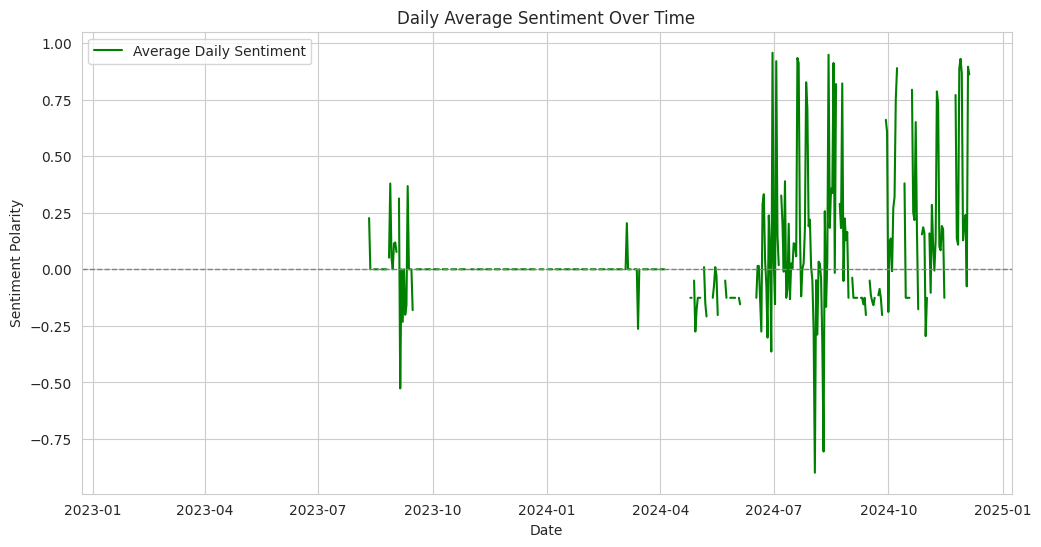

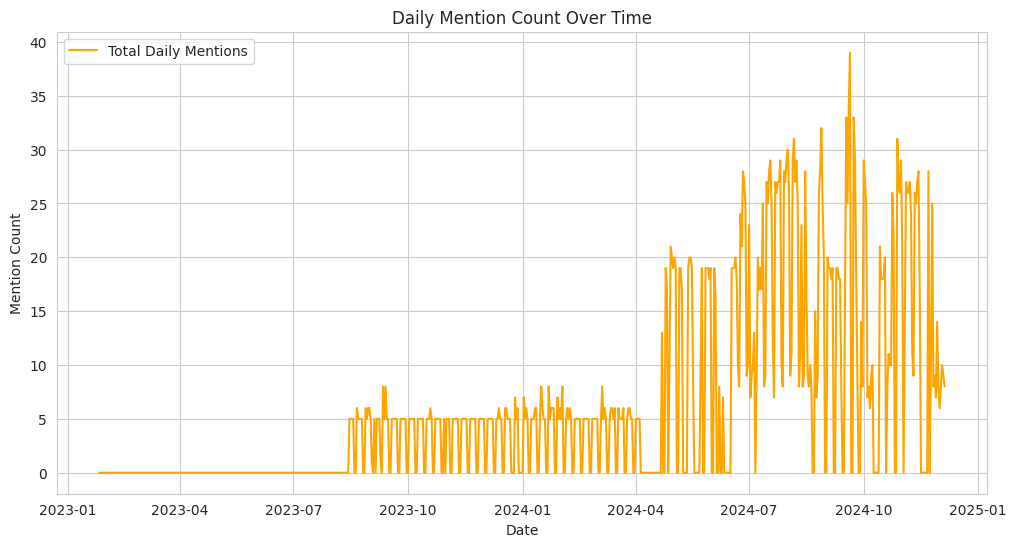

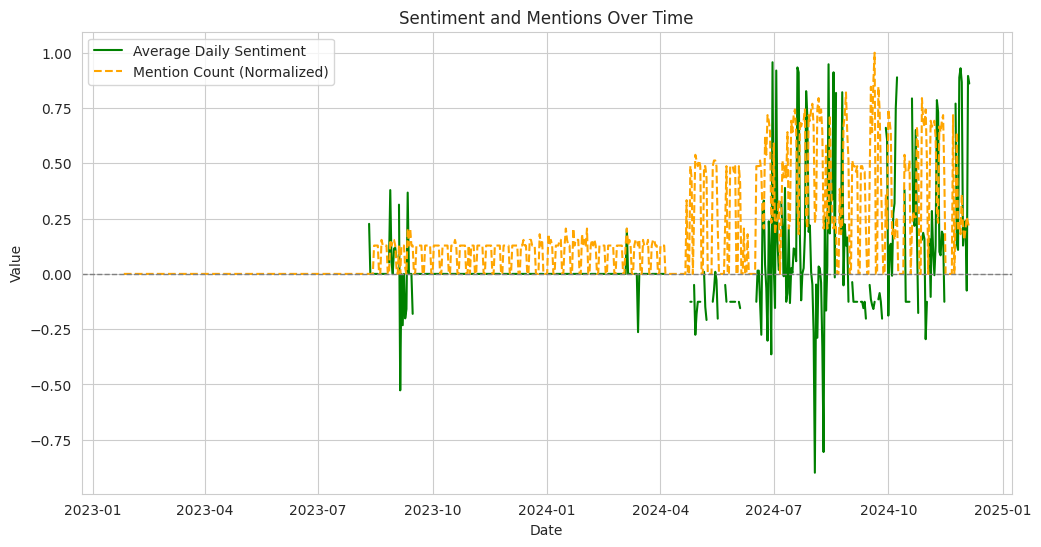

In [34]:
# Resample the data by day and compute the average sentiment and total mentions
df_daily_trends = df_messages.resample('D').agg({
    'polarity': 'mean',  # Average daily sentiment
    'mention_count': 'sum'  # Total daily mentions
})

# Visualization 1: Trends in sentiment over time
plt.figure(figsize=(12, 6))
plt.plot(df_daily_trends.index, df_daily_trends['polarity'], color='green', label='Average Daily Sentiment')
plt.title('Daily Average Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Polarity')
plt.axhline(0, color='gray', linestyle='--', lw=1)  # Line for neutral sentiment (0)
plt.legend()
plt.grid(True)
plt.show()

# Visualization 2: Trends in mentions over time
plt.figure(figsize=(12, 6))
plt.plot(df_daily_trends.index, df_daily_trends['mention_count'], color='orange', label='Total Daily Mentions')
plt.title('Daily Mention Count Over Time')
plt.xlabel('Date')
plt.ylabel('Mention Count')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Visualize both trends together
plt.figure(figsize=(12, 6))
plt.plot(df_daily_trends.index, df_daily_trends['polarity'], color='green', label='Average Daily Sentiment')
plt.plot(df_daily_trends.index, df_daily_trends['mention_count'] / df_daily_trends['mention_count'].max(), color='orange', label='Mention Count (Normalized)', linestyle='--')
plt.title('Sentiment and Mentions Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.axhline(0, color='gray', linestyle='--', lw=1)  # Line for neutral sentiment (0)
plt.legend()
plt.grid(True)
plt.show()

This code prepares and trains a machine learning model to predict a binary target (movement) based on sentiment (polarity) and mention count from a dataset of messages.

1.The prepare_prediction_data function selects relevant features and creates a binary target variable based on the sentiment polarity.

2.The train_prediction_model function splits the data into training and test sets, scales the features, and trains a RandomForest classifier.

3.The model is evaluated using metrics such as accuracy, precision, recall, and F1 score.

The main function orchestrates the preparation, training, and evaluation of the model, and prints the performance metrics.

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

def prepare_prediction_data(df_messages):
    """
    Prepare data for prediction using existing features
    """
    # Select relevant features
    features = [
        'polarity',
        'mention_count',
        # Add more relevant features if available
    ]

    # Create binary target based on sentiment
    df_messages['movement'] = np.where(df_messages['polarity'] > 0, 1, 0)

    X = df_messages[features]
    y = df_messages['movement']

    return X, y

def train_prediction_model(X, y):
    """
    Train machine learning model
    """
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train RandomForest Classifier
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_pred = model.predict(X_test_scaled)

    # Evaluation metrics
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

    return metrics, model

def main(df_messages):
    # Prepare data
    X, y = prepare_prediction_data(df_messages)

    # Train model
    metrics, model = train_prediction_model(X, y)

    # Print results
    print("\nModel Performance:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

    return metrics

# Run prediction
results = main(df_messages)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Model Performance:
Accuracy: 0.9898
Precision: 1.0000
Recall: 0.9649
F1 Score: 0.9821
